# Cleanup Reporting

This holds any analysis due to the clean up of the dataset.

Analysis includes:

1. Time jump between datapoints
2. Number of NULL rows
3. Location of NULL rows

In [2]:
# Preliminary setup
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_pickle('alldata.pickle')
df_clean = pd.read_pickle('alldata_clean.pickle')

In [4]:
# Check datatypes
display(df.dtypes)

active      float64
reactive    float64
volts       float64
amps        float64
sub1        float64
sub2        float64
sub3        float64
dtype: object

In [5]:
# How strict is the index, ie. what is the time difference between consecutive elements?
from collections import Counter
deltas = [d for d in map(lambda a: a[1] - a[0], zip(df.index, df.index[1:]))]
Counter(deltas)

Counter({Timedelta('0 days 00:01:00'): 2075258})

In [6]:
# Show rows with nulls
dfnulls = df[df.isnull().any(axis=1)]
dfnulls

,active,reactive,volts,amps,sub1,sub2,sub3
dtime,,,,,,,
2006-12-21 12:23:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 12:24:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 11:08:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 11:09:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 19:36:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-28 18:13:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 23:58:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-22 23:59:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-25 19:52:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# How many rows have a missing sample?
allnull = df.isnull().all(axis=1).sum()
somenull = df.isnull().any(axis=1).sum()
display("All: %d Some_not_all: %d" % (allnull, somenull-allnull))

'All: 25979 Some_not_all: 0'

In [8]:
# What percentage of rows is missing samples?
n_missing = sum(df.isnull().any(axis=1))
n_missing
"{}%".format(round(n_missing / len(df) * 100, 4))

'1.2518%'

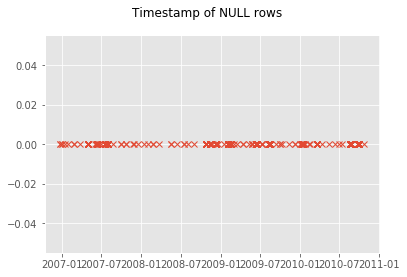

In [9]:
# Looks like all columns are NaN at once...
# Check the time positions of these
df1 = dfnulls.fillna(value=0)

plt.style.use('ggplot')

fig = plt.figure()
fig.suptitle('Timestamp of NULL rows')
ax = plt.axes()
ts = df1['active']
ax.plot(ts, marker='x', linewidth=0)

# Check time periods between NaN rows
deltas = [d for d in map(lambda a: a[1] - a[0], zip(dfnulls.index, dfnulls.index[1:]))]
#deltas

Single Jumps (1 Minute):

38
        Timejump                 Timestamp
41827   00:02:00 2007-01-14 19:35:00+01:00
61903   00:02:00 2007-01-28 18:12:00+01:00
142579  00:02:00 2007-03-25 19:51:00+02:00
236857  00:02:00 2007-06-01 21:13:00+02:00
244218  00:02:00 2007-06-06 23:55:00+02:00
247925  00:02:00 2007-06-09 13:43:00+02:00
247945  00:02:00 2007-06-09 14:04:00+02:00
276580  00:02:00 2007-06-29 11:58:00+02:00
310103  00:02:00 2007-07-22 20:52:00+02:00
357571  00:02:00 2007-08-24 20:22:00+02:00
485887  00:02:00 2007-11-21 22:03:00+01:00
496319  00:02:00 2007-11-29 03:56:00+01:00
523392  00:02:00 2007-12-17 23:10:00+01:00
562080  00:02:00 2008-01-13 19:59:00+01:00
590726  00:02:00 2008-02-02 17:26:00+01:00
663978  00:02:00 2008-03-24 14:21:00+01:00
780945  00:02:00 2008-06-13 20:51:00+02:00
855713  00:02:00 2008-08-04 19:02:00+02:00
894690  00:02:00 2008-08-31 20:40:00+02:00
1015060 00:02:00 2008-11-23 10:42:00+01:00
1054160 00:02:00 2008-12-20 15:33:00+01:00
1090555 00:02:00 2009-01-

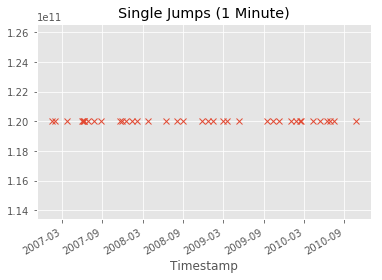

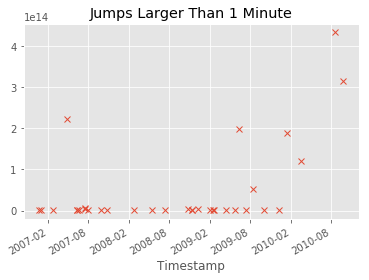

In [10]:
# Check time periods of missing data
deltas = [d for d in map(lambda a: a[1] - a[0], zip(df_clean.index, df_clean.index[1:]))]

# Check time gaps between 'good' data
df_clean['rowno']=df_clean.reset_index().index
timejumps = {}
for a, b in zip(df_clean.index, df_clean.index[1:]):
    if b - a != datetime.timedelta(minutes=1):
        timejumps[df_clean['rowno'][a]] = b-a, a

# Group into single jumps (1 minute) and larger jumps
tj = pd.DataFrame.from_dict(timejumps, orient='index', columns=['Timejump', 'Timestamp'])
tjgroups = tj.groupby(tj.iloc[:,0] > datetime.timedelta(minutes=2))

for key, item in tjgroups:
    if key:
        print('Jumps Larger Than 1 Minute:\n')
        print(len(tjgroups.get_group(key).index))
        print(tjgroups.get_group(key), "\n\n")
        tjgroups.get_group(key).plot(x='Timestamp', y='Timejump', marker='x', linewidth=0, legend=False, title='Jumps Larger Than 1 Minute')
    else:
        print('Single Jumps (1 Minute):\n')
        print(len(tjgroups.get_group(key).index))
        print(tjgroups.get_group(key), "\n\n")
        tjgroups.get_group(key).plot(x='Timestamp', y='Timejump', marker='x', linewidth=0, legend=False, title='Single Jumps (1 Minute)')